In [9]:
library(panda)
#importing data from csv file containing few columns instead of all
import pandas as pd

data = pd.read_csv('C:\\Users\\Nitz Mistry\\Desktop\\house-prices-advanced-regression-techniques\\train.csv',
                   usecols=["MSSubClass","LotArea","LotConfig","YearBuilt"])
data.head()

NameError: name 'library' is not defined

In [4]:
#tailfunction returns last 5 rows of data set
data.tail()

,MSSubClass,LotArea,LotConfig,YearBuilt
1455,60,7917,Inside,1999
1456,20,13175,Inside,1978
1457,70,9042,Inside,1941
1458,20,9717,Inside,1950
1459,20,9937,Inside,1965


In [6]:
#shape function returns the number of rwos and columns in dataset
data.shape

(1460, 4)

In [7]:
#Encoders convert the non-numerical data to numerical format,here 'LotConfig' is converted to numerical data
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
encoded_data=data.apply(labelencoder.fit_transform)
encoded_data.head()

,MSSubClass,LotArea,LotConfig,YearBuilt
0,5,327,4,104
1,0,498,2,77
2,5,702,4,102
3,6,489,0,19
4,5,925,2,101


In [8]:
one_hot_encodeder = preprocessing.OneHotEncoder()
one_hot_encodeder.fit(encoded_data)
onehotlabels = one_hot_encodeder.transform(encoded_data).toarray()
print(onehotlabels)
onehotlabels.shape

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


C:\Users\nitzm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(1460, 1205)

In [14]:
#Actual projects starts from here
#Here selected few columns for the dataset
data_selected = pd.read_csv('train.csv',
                   usecols=["MSSubClass","LotArea","GrLivArea","YearBuilt"])
data_selected.head()

,MSSubClass,LotArea,YearBuilt,GrLivArea
0,60,8450,2003,1710
1,20,9600,1976,1262
2,60,11250,2001,1786
3,70,9550,1915,1717
4,60,14260,2000,2198


In [11]:
#Reading out full data from train dataset just to get the sale price column, as in the above data we had selected few columns 
#which did not contain 'SalePrice' column 
full_dataset = pd.read_csv('train.csv')
full_dataset.head()

#Retrieving expected output-> SalePrice
y_sale_price_full=full_dataset['SalePrice']
#I am removing the last entry from 'SalePrice' column, as there was mismatch between number of rows of train and test csv 
y_sale_price_train = y_sale_price_full.iloc[:-1]

print(y_sale_price_train.head())
print(y_sale_price_train.shape)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
(1459,)


In [12]:
"""data_selected = pd.read_csv('train.csv',
                   usecols=["MSSubClass","LotArea","GrLivArea","YearBuilt"])
data_selected.head()"""

#Retieving full test data from test.csv
full_test_dataset=pd.read_csv('test.csv')
#Retieving selected test data from test.csv
test_data_selected = pd.read_csv('test.csv',
                   usecols=["MSSubClass","LotArea","GrLivArea","YearBuilt"])

print(test_data_selected.head())
print(test_data_selected.shape)


   MSSubClass  LotArea  YearBuilt  GrLivArea
0          20    11622       1961        896
1          20    14267       1958       1329
2          60    13830       1997       1629
3          60     9978       1998       1604
4         120     5005       1992       1280
(1459, 4)


In [17]:
#Fitting selected data from train.csv to linear regression model, this will train the model as per the train.csv data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(data_selected,y_sale_price_full)

#predictig 'SalePrice' for the dataset from test.csv
y_sale_price_predicted = linreg.predict(test_data_selected)
print(y_sale_price_predicted.shape)

(1459,)


In [20]:
#  Calculated mean absolute error
from sklearn import metrics
print(metrics.mean_absolute_error(y_sale_price_train, y_sale_price_train))

76273.92981686455


In [22]:
# Calculated root mean absolute error
#y_sale_price_train -> expected output
#y_sale_price_predicted ->observed ouput
import numpy as np
print(np.sqrt(metrics.mean_absolute_error(y_sale_price_train, y_sale_price_predicted)))

276.1773521070556


In [24]:
# Calculated root mean absolute error of logarithmic value of expected and observed 'SalePrice' 
#print(np.log(y_test))
print(np.sqrt(metrics.mean_absolute_error(np.log(y_sale_price_train), np.log(y_sale_price_predicted))))

0.6575055962391688


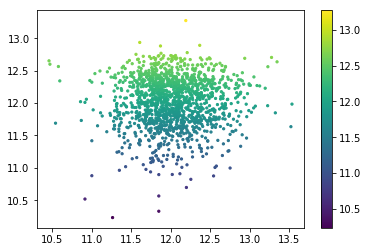

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(np.log(y_sale_price_train), np.log(y_sale_price_predicted),s=5,c=np.log(y_sale_price_predicted) )
plt.colorbar()

plt.show()

In [27]:
# Copying the values to my_submission.csv
id_full=full_dataset['Id']
id_for_output = id_full.iloc[:-1]
my_submission = pd.DataFrame({'Id': id_for_output, 'SalePrice': y_sale_price_predicted})
my_submission.to_csv('submission.csv', index=False)